In [61]:
import pandas as pd
import numpy as np
import random as rndda

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

##Mounting your Google Drive in your virtual machine

##Reading data set


In [62]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


##describing data

In [63]:
# https://www.kaggle.com/c/titanic/data
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [64]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


##what are the data types for features


In [66]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##What is the distribution of numerical feature values across the samples


In [67]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [68]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


##Analyze by pivoting features ---> the higher the number means more correlation with the target


In [69]:
print(train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('_'*20)
print(train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('_'*20)
print(train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('_'*20)
print(train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
____________________
      Sex  Survived
0  female  0.742038
1    male  0.188908
____________________
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
____________________
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


## Question 1: Answer: As we observerd the P-class and Sex have survival prediction rate of 0.62 and 0.74. Hence these features will play a key role in training the model. 

##Analyze by visualizing data
###Correlating numerical features

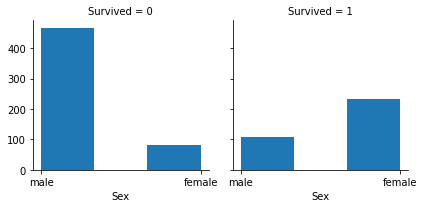

In [70]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Sex', bins=3)

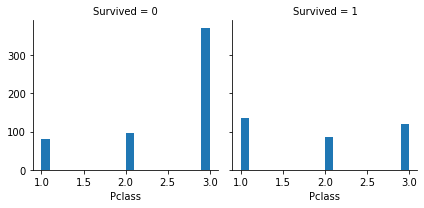

In [71]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Pclass', bins=20)

# Question:2 The above are the visualizations of the survived with Class and Gender features.
Inference: Male have not survived much when compared with females and we can observe this pattern in both survived and not survived histograms.


Pclass: 3 has huge percentage of people not survived which is a key observation in this visualization.
Pclass 1 and 3 have equal survival rate as per the above graph.

# Plot the correlation between the columns = 'Survived' and 'Age'

c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


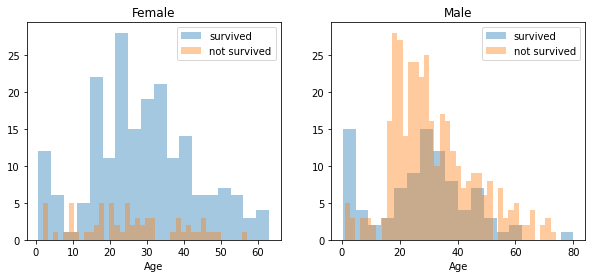

In [72]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

##Correlating categorical features


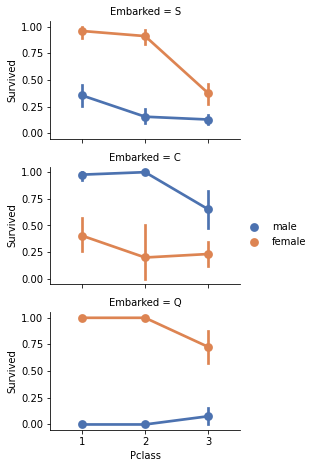

In [73]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep',order=[1, 2, 3], hue_order=None)
grid.add_legend()

c:\users\eduku\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


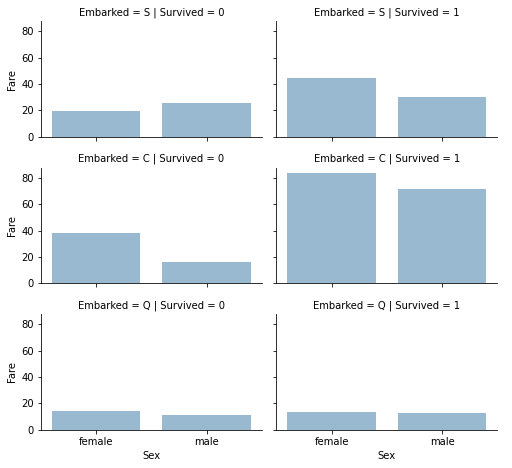

In [47]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

##Correcting by dropping features


In [74]:
train_df = train_df.drop(['Ticket', 'Cabin','Parch','SibSp'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin','Parch','SibSp'], axis=1)

##Creating new feature by extracting from existing

In [75]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [76]:
print(dataset['Title'])

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object


###Creating new feature extracting from existing


In [77]:
for dataset in combine:
     dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Jonkheer', 'Dona'], 'Lady')
     dataset['Title'] = dataset['Title'].replace(['Capt', 'Don', 'Major', 'Sir'], 'Sir')
     dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
     dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
     dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

###We can convert the categorical titles to ordinal





In [78]:
title_mapping = {"Col": 1, "Dr": 2, "Lady": 3, "Master": 4, "Miss": 5, "Mr": 6, "Mrs": 7, "Rev": 8, "Sir": 9}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

##Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId


In [79]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

##Converting a categorical feature


In [80]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

##Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.
##filling NA valuaes

In [81]:
print(train_df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64


In [82]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [83]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [84]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [85]:
meanAge = int(train_df.Age.dropna().mean())
print('Mean Age = ', meanAge)

Mean Age =  29


##Converting categorical feature to numeric


In [86]:
for dataset in combine:
    dataset['Age'] = dataset['Age'].fillna(meanAge)
    dataset['Fare'] = dataset['Fare'].fillna(test_df['Fare'].dropna().median())

# Export preprocessed data to a new CSV file

In [87]:
combine[0].to_csv('train_preprocessed.csv',index=False)
combine[1].to_csv('test_preprocessed.csv',index=False)